In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("datasets/telomerase_06_descriptors.csv")
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.136677
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022276
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.221849
661,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.040959
662,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.251812
663,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008774


In [3]:
df = df.dropna()
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.136677
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022276
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.221849
661,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.040959
662,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.251812
663,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008774


In [4]:
X = df.drop("pIC50", axis=1)
y = df["pIC50"]

In [5]:
X.shape

(664, 881)

Remove low variance features

In [6]:
# selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
# X = selection.fit_transform(X)
# X.shape

Split the train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Model Training

Train a XGBRegressor model

In [8]:
from catboost import CatBoostRegressor

In [9]:
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.036265
0:	learn: 0.9451657	total: 179ms	remaining: 2m 58s
1:	learn: 0.9405159	total: 201ms	remaining: 1m 40s
2:	learn: 0.9349899	total: 233ms	remaining: 1m 17s
3:	learn: 0.9299174	total: 259ms	remaining: 1m 4s
4:	learn: 0.9248802	total: 283ms	remaining: 56.3s
5:	learn: 0.9209825	total: 293ms	remaining: 48.6s
6:	learn: 0.9173883	total: 324ms	remaining: 46s
7:	learn: 0.9146974	total: 357ms	remaining: 44.3s
8:	learn: 0.9095757	total: 387ms	remaining: 42.6s
9:	learn: 0.9076285	total: 418ms	remaining: 41.4s
10:	learn: 0.9061708	total: 429ms	remaining: 38.5s
11:	learn: 0.9025175	total: 447ms	remaining: 36.8s
12:	learn: 0.8973526	total: 466ms	remaining: 35.4s
13:	learn: 0.8944092	total: 485ms	remaining: 34.2s
14:	learn: 0.8904891	total: 495ms	remaining: 32.5s
15:	learn: 0.8868385	total: 504ms	remaining: 31s
16:	learn: 0.8846987	total: 515ms	remaining: 29.8s
17:	learn: 0.8811279	total: 536ms	remaining: 29.2s
18:	learn: 0.8784704	total: 553ms	remaining: 28.5s
19:	learn: 0

In [10]:
y_train_pred = regressor.predict(X_train)

In [11]:
print(f"Training R2 = {r2_score(y_train, y_train_pred):.3f}")
print(f"Training RMSE = {mean_squared_error(y_train, y_train_pred, squared=False):.3f}")

Training R2 = 0.827
Training RMSE = 0.395


## Model Evaluation

Predict on test set

In [12]:
y_test_pred = regressor.predict(X_test)

In [13]:
print(f"Testing R2 = {r2_score(y_test, y_test_pred):.3f}")
print(f"Testing RMSE = {mean_squared_error(y_test, y_test_pred, squared=False):.3f}")

Testing R2 = 0.313
Testing RMSE = 0.829


<function matplotlib.pyplot.show(close=None, block=None)>

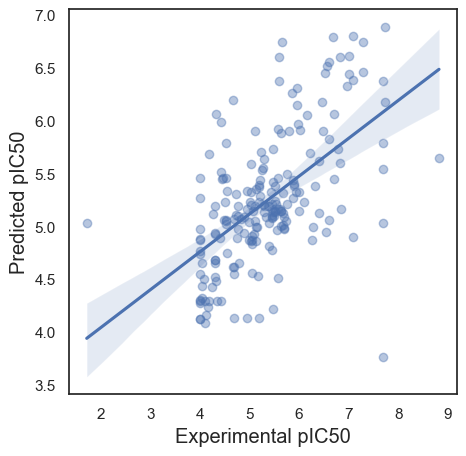

In [14]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large')
ax.set_ylabel('Predicted pIC50', fontsize='large')
ax.figure.set_size_inches(5, 5)
plt.show

## Use LazyPredict

In [15]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [16]:
regressor = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = regressor.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [03:04<00:00,  4.40s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [02:08<00:00,  3.06s/it]


In [17]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,286896394176986496.00,-259012295390886304.00,483022170.17,0.04
Lars,1425941953872374.50,-1287351483193632.25,34053005.09,0.43
KernelRidge,35.17,-29.85,5.27,0.10
QuantileRegressor,2.11,-0.00,0.95,7.01
LassoLars,2.11,0.00,0.95,0.09
DummyRegressor,2.11,0.00,0.95,0.06
ElasticNet,2.11,0.00,0.95,0.08
Lasso,2.11,0.00,0.95,0.05
LarsCV,2.11,0.00,0.95,5.93


In [18]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,21129472337133034826722423310118813696.00,-72413568512184569101778118157380091904.00,8504937728537689088.00,0.25
LinearRegression,298237947090988141903872.00,-1022101909125899013324800.00,1010434725020.87,0.28
TransformedTargetRegressor,298237947090988141903872.00,-1022101909125899013324800.00,1010434725020.87,0.16
SGDRegressor,7845234390619894.00,-26886682685441040.00,163881441.01,0.03
KernelRidge,9.68,-28.75,5.45,0.04
GaussianProcessRegressor,7.80,-22.30,4.82,0.34
Ridge,1.43,-0.46,1.21,0.05
LinearSVR,1.40,-0.39,1.18,0.35
PassiveAggressiveRegressor,1.39,-0.32,1.15,0.06


[(0.0, 1.0)]

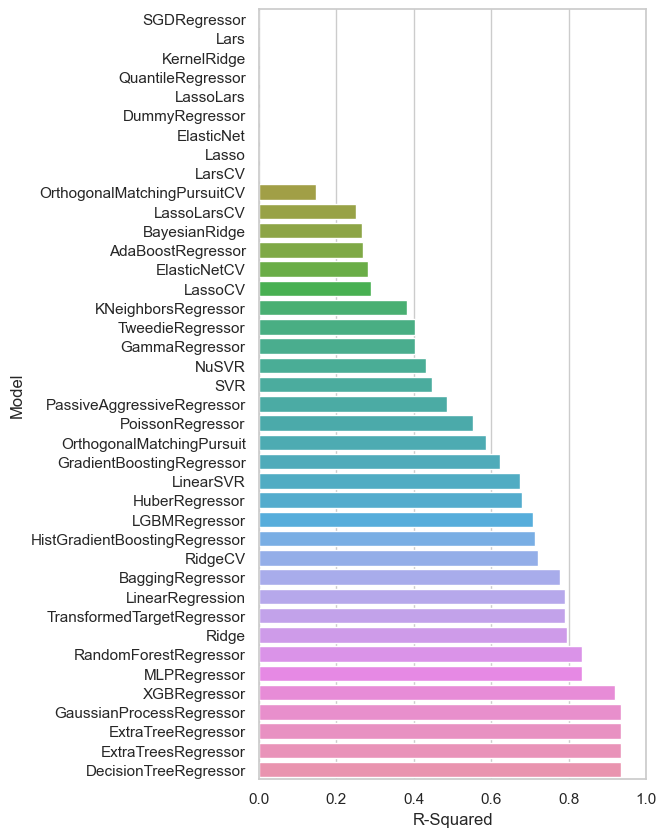

In [19]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

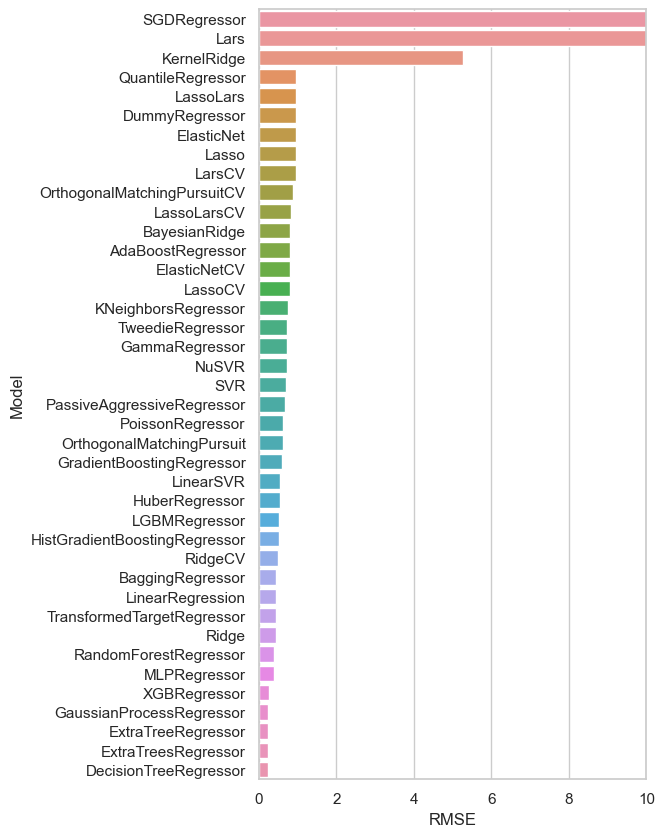

In [20]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

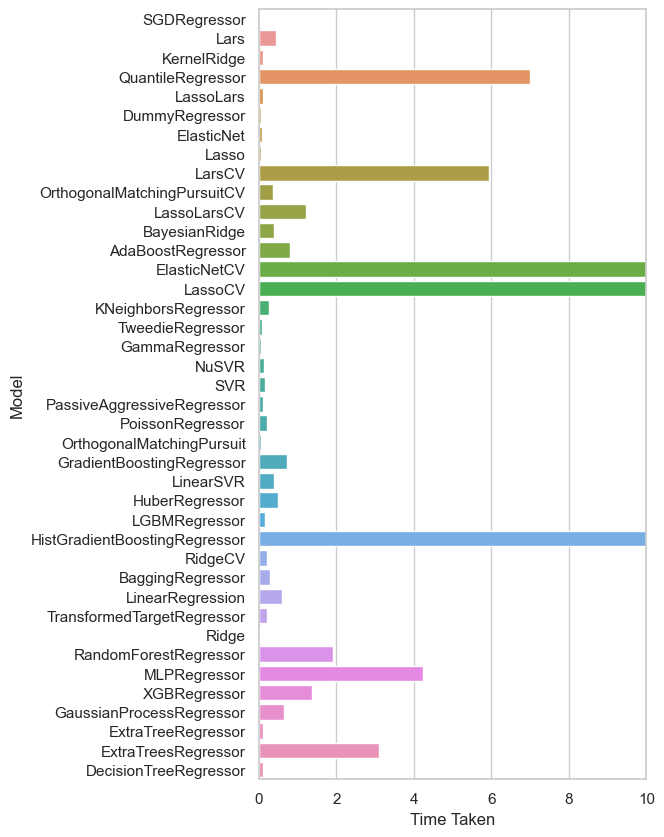

In [21]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))